In [22]:
import os
import sys

In [23]:
def get_last_objective(path: str) -> str:
    with open(path, "r") as f:
        lines = f.readlines()

    # Last non-empty line
    _, _, objective = lines[-1].split(",")

    return int(objective)

In [25]:
objectives = []

for filename in os.listdir("../grasp_tuning"):
    name, ext = os.path.splitext(filename)

    if ext != ".out":
        continue

    instance, size, run, alpha = name.split("-")

    size = int(size)
    run = int(run)
    alpha = float(alpha)

    try:
        objective = get_last_objective(f"../grasp_tuning/{filename}")
    except: 
        print(f"Error reading {filename}", file=sys.stderr)
        continue
    objectives.append((instance, size, alpha, run, objective))

Error reading mix-50-2-0.3.out


In [20]:
objectives

[('mix', 50, 0.1, 2, 5853), ('mix', 50, 0.0, 2, 1)]

In [26]:
import pandas as pd

# Columns: alpha, instance, run, objective
df = pd.DataFrame(objectives, columns=["instance", "size", "alpha", "run", "objective"])

<Axes: xlabel='alpha'>

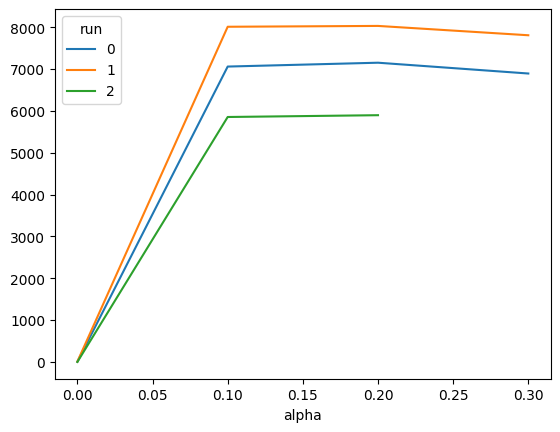

In [30]:
df.groupby(["alpha", "run"])["objective"].mean().unstack().plot()

In [33]:
mean_objective_df = df.groupby(["alpha", "run"])["objective"].mean().to_frame()
mean_objective_df

objective
alpha run           
0.0   0          5.0
      1         10.0
      2          1.0
0.1   0       7058.0
      1       8009.0
      2       5853.0
0.2   0       7150.0
      1       8029.0
      2       5896.0
0.3   0       6892.0
      1       7806.0

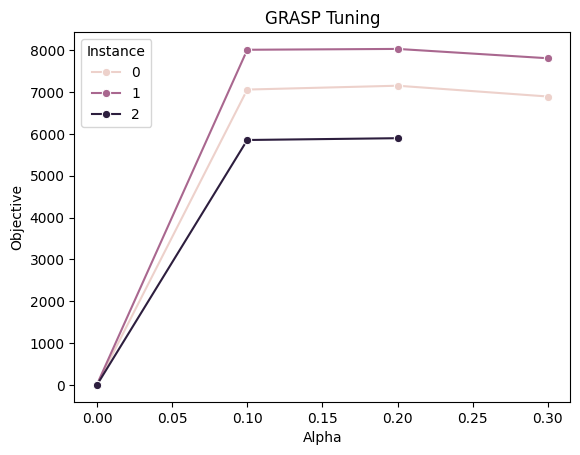

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()


sns.lineplot(
    x="alpha",
    y="objective",
    data=mean_objective_df,
    hue="run",
    marker="o",
    ax=ax,
)

ax.set_xlabel("Alpha")
ax.set_ylabel("Objective")
ax.set_title("GRASP Tuning")
plt.legend(title="Run")

fig.savefig("grasp_tuning.png", dpi=300, bbox_inches="tight")